In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
import mglearn

### 2.3.8 神经网络
一类被称为神经网络的算法最近以“深度学习”的名字再度流行。虽然深度学习在许多机器学习应用中都有巨大的潜力，但深度学习算法往往经过精确调整，只适用于特定的使用场景。这里只讨论一些相对简单的方法，即用于分类和回归的多层感知机(multilayer perceptron，MLP)，它可以作为研究更复杂的深度学习方法的起点。MLP也被称为(普通)前馈神经网络，有时也简称为神经网络。

#### 2.3.8.1 神经网络模型
MLP可以被视为广义的线性模型，执行多层处理后得到结论。

线性回归的预测公式为：
$\hat{y} = w[0]*x[0] + w[1]*x[1] ... + w[p]*x[p] + b$

其中，$\hat{y}$是输入特征$x[0]$到$x[p]$的加权求和，权重为学到的系数$w[0]$到$w[p]$。我们可以将这个公式可视化：

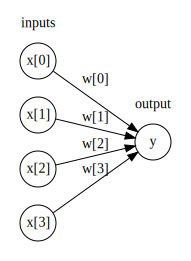

In [2]:
mglearn.plots.plot_logistic_regression_graph()

上图显示Logistic回归，其中输入特征和预测结果显示为结点，系数是结点之间的连线。左边的每个结点代表一个输入特征，连线代表学到的系数，右边的结点代表输出，是输入的加权求和。

在MLP中，多次重复这个计算加权求和的过程，首先计算代表中间过程的隐单元(hidden unit)，然后再计算这些隐单元的加权求和并得到最终结果：

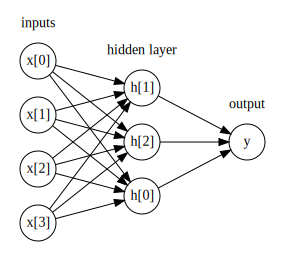

In [3]:
mglearn.plots.plot_single_hidden_layer_graph()

这个模型需要学习更多的系数(也叫作权重)：在每个输入与每个隐单元(隐单元组成了隐层)之间有一个系数，在每个隐单元与输出之间也有一个系数。

从数学的角度看，计算一系列加权求和与只计算一个加权求和是完全相同的，因此，为了让这个模型真正比线性模型更为强大，我们还需要一个技巧。在计算完每个隐单元的加权求和之后，对结果再应用一个非线性函数——通常是校正非线性(rectifying nonlinearity，也叫校正线性单元或$relu$)或正切双曲线(tangens hyperbolicus，$tanh$)。然后将这个函数的结果用于加权求和，计算得到输出$\hat{y}$。这两个函数的可视化效果可以参考下图，其中，$relu$截断小于0的值，而$tanh$在输入值较小时接近-1，在输入值较大时接近+1。有了这两种非线性函数，神经网络可以学习比线性模型复杂得多的函数:

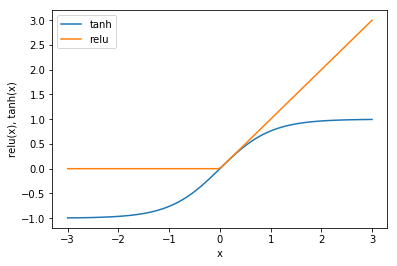

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.gcf().set_size_inches(6, 4)
plt.show()

对于上图所示的小型神经网络，计算$\hat{y}$的完整公式如下(使用$tanh$非线性)：

$\begin{aligned}&h[0]=\tanh(w[0,0]*x[0]+w[1,0]*x[1]+w[2,0]*x[2]+w[3,0]*x[3]+b[0])\\&h[1]=\tanh(w[0,0]*x[0]+w[1,0]*x[1]+w[2,0]*x[2]+w[3,0]*x[3]+b[1])\\&h[2]=\tanh(w[0,0]*x[0]+w[1,0]*x[1]+w[2,0]*x[2]+w[3,0]*x[3]+b[2])\\&\hat{y}=v[0]*h[0]+v[1]*h[1]+v[2]*h[2]+b\end{aligned}$

其中，$w$是输入$x$与隐层$h$之间的权重，$v$是隐层$h$与输出$\hat{y}$之间的权重。权重$w$和$v$要从数据中学习得到，$x$是输入特征，$\hat{y}$是计算得到的输出，$h$是计算的中间结果。需要用户设置的一个重要参数是隐层中的结点个数。对于非常小或非常简单的数据集，这个值可以小到10；对于非常复杂的数据，这个值可以大到10000。也可以添加多个隐层，如下图所示：

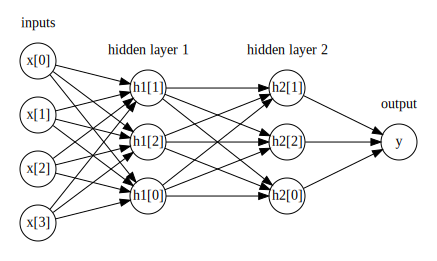

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

#### 2.3.8.2 神经网络调参
我们将MLPClassifier应用到本章前面用过的$two\_moons$数据集上，以此研究MLP的工作原理。

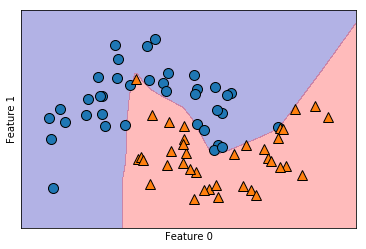

In [6]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

如你所见，神经网络学到的决策边界完全是非线性的，但相对平滑。我们用到了$solver='lbfgs'$，这一点稍后会讲到。

默认情况下，MLP使用100个隐结点，这对于这个小型数据集来说已经相当多了。我们可以减少其数量(从而降低了模型复杂度)，但仍然得到很好的结果：

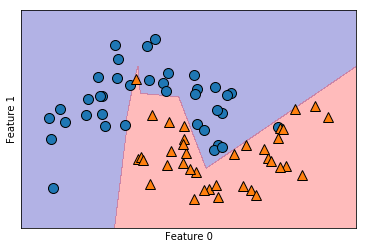

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

只有10个隐单元时，决策边界看起来更加参差不齐。默认的非线性是$relu$。如果使用单隐层，那么决策函数将由$10$个直线段组成。如果想得到更加平滑的决策边界，可以添加更多的隐单元、添加第二个隐层或者使用$tanh$非线性：

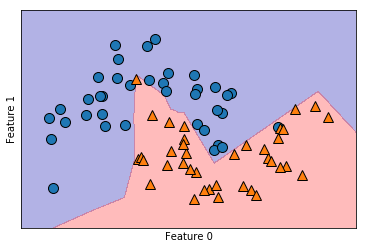

In [8]:
# 使用2个隐层，每个包含10个单元
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

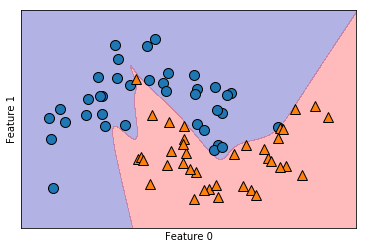

In [9]:
# 使用2个隐层，每个包含10个单元，这次使用tanh非线性
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

最后，我们还可以利用$L2$惩罚使权重趋向于$0$，从而控制神经网络的复杂度。MLPClassifier中调节$L2$惩罚的参数是$alpha$，它的默认值很小(弱正则化)。下面一组图显示了不同$alpha$值对`two_moons数据集`的影响：

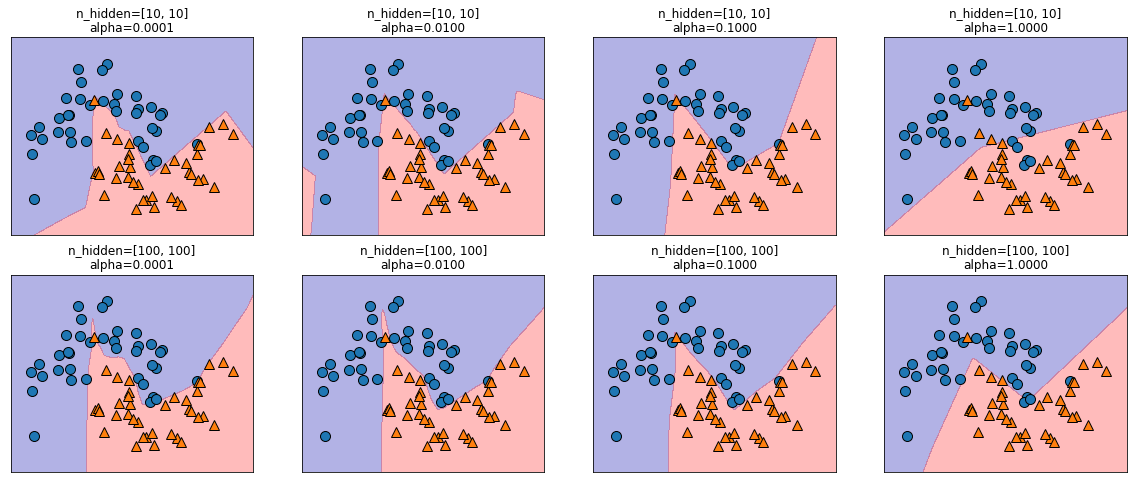

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

plt.show()

控制神经网络复杂度的方法有很多种：隐层的个数、每个隐层中的单元个数与正则化。实际上还有更多，但这里不再过多介绍。

神经网络的一个重要性质是，在开始学习之前其权重是随机设置的，这种随机初始化会影响学到的模型。也就是说，即使使用完全相同的参数，如果随机种子不同的话，我们也可能得到非常不一样的模型。如果网络很大，并且复杂度选择合理的话，那么这应该不会对精度有太大影响，但应该记住这一点（特别是对于较小的网络）。下图显示了几个模型的图像，所有模型都使用相同的参数设置进行学习：

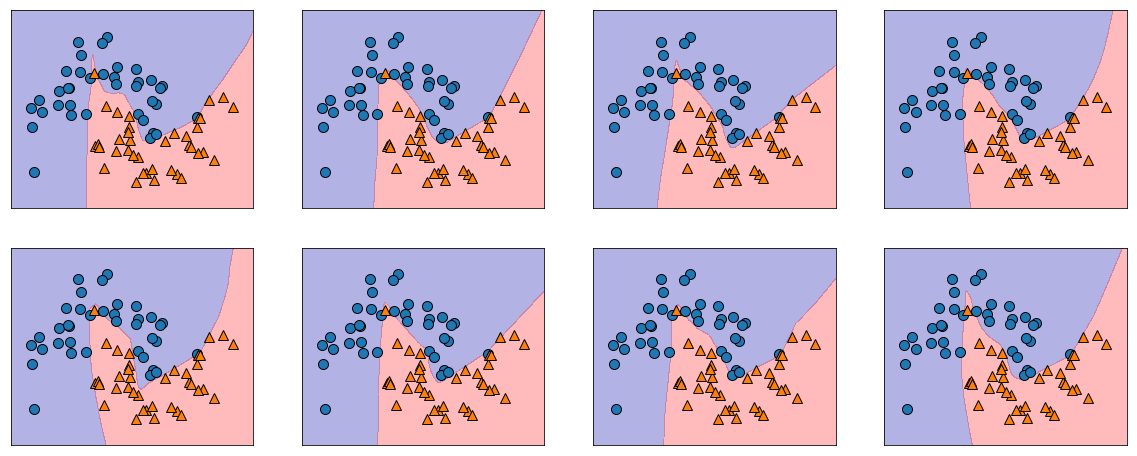

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
plt.show()

为了在现实世界的数据上进一步理解神经网络，我们将MLPClassifier应用在乳腺癌数据集上。首先使用默认参数：

In [12]:
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]
Accuracy on training set: 0.91
Accuracy on test set: 0.88


神经网络也要求所有输入特征的变化范围相似，最理想的情况是均值为0、方差为1。这里将人工完成，scikit-learning库的StandardScaler可以自动完成：

In [13]:
# 计算训练集中每个特征的平均值
mean_on_train = X_train.mean(axis=0)
# 计算训练集中每个特征的标准差
std_on_train = X_train.std(axis=0)

# 减去平均值，然后乘以标准差的倒数
# 如此运算之后，mean=0，std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 对测试集做相同的变换（使用训练集的平均值和标准差）
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


缩放之后的结果要好得多，不过模型给出了一个警告，告诉我们已经达到最大迭代次数。这是用于学习模型的$adam$算法的一部分，告诉我们应该增加迭代次数：

In [14]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


模型的表现相当不错，由于训练性能和测试性能之间仍有一些差距，所以我们可以尝试降低模型复杂度来得到更好的泛化性能。这里我们选择增大$alpha$参数(变化范围相当大，从0.0001到1)，以此向权重添加更强的正则化：

In [15]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


虽然可以分析神经网络学到了什么，但这通常比分析线性模型或基于树的模型更为复杂。要想观察模型学到了什么，一种方法是查看模型的权重。下图中的行对应30个输入特征，列对应100个隐单元。浅色代表较大的正值，而深色代表负值：

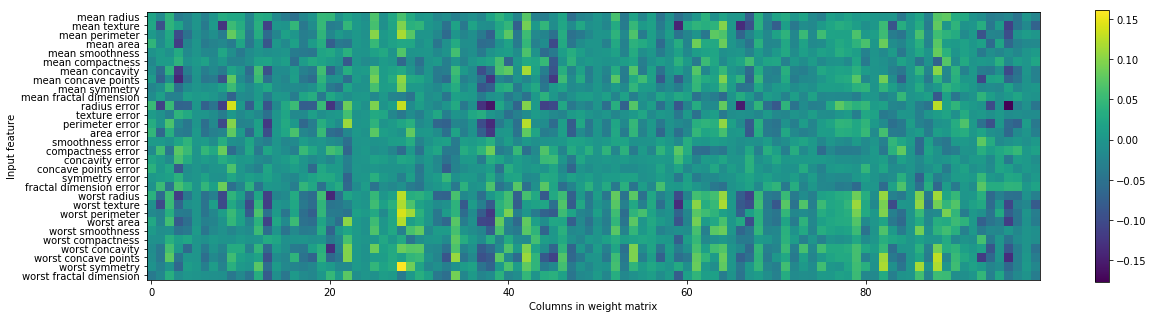

In [16]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()
plt.show()

我们可以推断，如果某个特征对所有隐单元的权重都很小，那么这个特征对模型来说就“不太重要”。可以看到，与其他特征相比，“mean smoothness”“mean compactness”以及“smoothness error”和“fractal dimension error”之间的特征的权重都相对较小。这可能说明这些特征不太重要，也可能是我们没有用神经网络可以使用的方式来表示这些特征。

我们还可以将连接隐层和输出层的权重可视化，但它们更加难以解释。

*虽然$MLPClassifier$和$MLPRegressor$为最常见的神经网络架构提供了易于使用的接口，但它们只包含神经网络潜在应用的一部分。对于Python用户来说，最为完善的机器学习库是keras、lasagna和tensor-flow。lasagna是基于theano库构建的，而keras既可以用tensor-flow也可以用theano。这些库提供了更为灵活的接口，可以用来构建神经网络并跟踪深度学习研究的快速发展。所有流行的深度学习库也都允许使用高性能的图形处理单元GPU，而scikit-learn不支持GPU。使用GPU可以将计算速度加快10到100倍，GPU对于将深度学习方法应用到大型数据集上至关重要。*

#### 2.3.8.3 优点、缺点和参数
神经网络的主要优点之一是能够获取大量数据中包含的信息，并构建无比复杂的模型。给定足够的计算时间和数据，并且仔细调节参数，神经网络通常可以打败其他机器学习算法（无论是分类任务还是回归任务）。

神经网络的缺点，特别是功能强大的大型神经网络，通常需要很长的训练时间。它还需要仔细地预处理数据，与SVM类似，神经网络在“均匀”数据上的性能最好，其中“均匀”是指所有特征都具有相似的含义。如果数据包含不同种类的特征，那么基于树的模型可能表现得更好。神经网络调参本身也是一门艺术。调节神经网络模型和训练模型的方法有很多种，我们只是蜻蜓点水地尝试了几种而已。

估计神经网络的复杂度。最重要的参数是层数和每层的隐单元个数。你应该首先设置1个或2个隐层，然后可以逐步增加。每个隐层的结点个数通常与输入特征个数接近，但在几千个结点时很少会多于特征个数。

在考虑神经网络的模型复杂度时，一个有用的度量是学到的权重的个数。如果你有一个包含100个特征的二分类数据集，模型有100个隐单元，那么输入层和第一个隐层之间就有$100*100 = 10000$个权重。在隐层和输出层之间还有$100*1 = 100$个权重，总共约10100个权重。如果添加含有100个隐单元的第二个隐层，那么在第一个隐层和第二个隐层之间又有$100*100 = 10000$个权重，总数变为约20100个权重。如果你使用包含1000个隐单元的单隐层，那么在输入层和隐层之间需要学习$100*1000 = 100000$个权重，隐层到输出层之间需要学习$1000*1 = 1000$个权重，总共101000个权重...

神经网络调参的常用方法是，首先创建一个大到足以过拟合的网络，确保这个网络可以对任务进行学习。知道训练数据可以被学习之后，要么缩小网络，要么增大$alpha$来增强正则化，这可以提高泛化性能。

在我们的实验中，主要关注模型的定义：层数、每层的结点个数、正则化和非线性。这些内容定义了我们想要学习的模型。还有一个问题是，如何学习模型或用来学习参数的算法，这一点由$solver$参数设定。$solver$有两个好用的选项。默认选项是$adam$，在大多数情况下效果都很好，但对数据的缩放相当敏感(因此，始终将数据缩放为均值为0、方差为1是很重要的)。另一个选项是$lbfgs$，其鲁棒性相当好，但在大型模型或大型数据集上的时间会比较长。还有更高级的$sgd$选项，许多深度学习研究人员都会用到。$sgd$选项还有许多其他参数需要调节，以便获得最佳结果。你可以在用户指南中找到所有这些参数及其定义。当你开始使用MLP时，我们建议使用$adam$和$lbfgs$。

> `fit`会重置模型
> 
> `scikit-learn`模型的一个重要性质就是，调用`fit`总会重置模型之前学到的所有内容。因此，如果你在一个数据集上构建模型，然后在另一个数据集上再次调用`fit`，那么模型会“忘记”从第一个数据集中学到的所有内容。你可以对一个模型多次调用`fit`，其结果与在“新”模型上调用`fit`是完全相同的

***现在你可能已经注意到了，许多表现很好的模型都得到了完全相同的精度0.972。这说明所有模型犯错的数量完全相同，也就是4个。如果你对比实际预测结果，甚至会发现它们都在相同的地方犯错！这可能是因为数据集非常小，或者是因为这些点与其他点的确不同。***